<a href="https://colab.research.google.com/github/juszhou/NYUML/blob/main/alikhan_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
feature = pd.read_csv('https://raw.githubusercontent.com/BolunDai0216/NYUMLSummerSchool21/main/day05/fish_market_feature.csv')
label = pd.read_csv('https://raw.githubusercontent.com/BolunDai0216/NYUMLSummerSchool21/main/day05/fish_market_label.csv')
X = feature.values
y = label.values

In [9]:
X.shape, y.shape

((124, 5), (124, 1))

Text(0, 0.5, 'Labels')

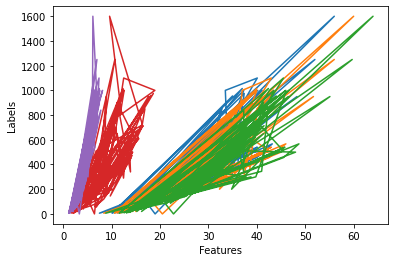

In [10]:
plt.plot(X, y)
plt.xlabel("Features")
plt.ylabel("Labels")

In [11]:
# Create Design Matrix
def design_matrix(x, M):
  o = np.ones(M)
  Design_Matrix = np.ones((X.shape[0], M + 1))

  for i in range(M):
    Design_Matrix[:, i + 1] = x ** (i + 1)

  return Design_Matrix

In [13]:
# Fit Data (use linear regression, LASSO or rigde regression)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=1)

poly = PolynomialFeatures(21)

X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_val)

clf = linear_model.Lasso(alpha=0.1, tol=0.04)
clf.fit(X_train_poly, y_train)

y_train_pred = clf.predict(X_train_poly)
y_val_pred = clf.predict(X_val_poly)

In [14]:
# Get MSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Train MSE " + str(mean_squared_error(y_train, y_train_pred)))
print("Train MAE " + str(mean_absolute_error(y_train, y_train_pred)))

print("Validation MSE " + str(mean_squared_error(y_val, y_val_pred)))
print("Validation MAE " + str(mean_absolute_error(y_val, y_val_pred)))

Train MSE 1029.274215742418
Train MAE 18.23974164068085
Validation MSE 1727.8914928174158
Validation MAE 24.669067984580625


In [15]:
X_test = pd.read_csv('https://raw.githubusercontent.com/BolunDai0216/NYUMLSummerSchool21/main/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://raw.githubusercontent.com/BolunDai0216/NYUMLSummerSchool21/main/day05/fish_market_test_label.csv').values

y_test_pred = clf.predict(X_test_poly)

print("Test MSE: " + str(mean_squared_error(y_test, y_test_pred)))
print("Test MAE: " + str(mean_absolute_error(y_test, y_test_pred)))

ValueError: ignored